# Project: TMDb Movies Dataset Investigation

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
>This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue.
>
>**Questions**:
- How the number of movies produced each year changed over the time ? 
- Which genres are most popular from year to year ? 
- What kinds of properties are associated with movies that have high revenues ? 

In [1]:
# imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

<a id="wrangling"></a>
# Data Wrangling
### General Properties

In [2]:
# loading data
df = pd.read_csv('tmdb-movies.csv')
# few lines from the dataset
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

In [3]:
# informations about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

The dataset contains 21 columns and 10865 rows,
there is somme columns with type object and somme rows with missing values

**Find the data type for each Attribute**

In [4]:
# data types
print('\033[1;32;1m{:<25} {:<15}'.format('Attribute', 'Data Type'))
for col in df.columns:
    print('\033[1;30;1m{:<25} {:<15}'.format(col, str(type(df[col][0])).split("'")[1]))

Attribute                 Data Type      
id                        numpy.int64    
imdb_id                   str            
popularity                numpy.float64  
budget                    numpy.int64    
revenue                   numpy.int64    
original_title            str            
cast                      str            
homepage                  str            
director                  str            
tagline                   str            
keywords                  str            
overview                  str            
runtime                   numpy.int64    
genres                    str            
production_companies      str            
release_date              str            
vote_count                numpy.int64    
vote_average              numpy.float64  
release_year              numpy.int64    
budget_adj                numpy.float64  
revenue_adj               numpy.float64  


###### All attributes are of type String or numerical (int / float)

### Data Cleaning
There is some columns that are not going to be used in our investigation like 'keywords', 'tagline', 'director'... generaly all the columns of type str, so lets drop those columns

In [5]:
# drop columns that not gonna be used
df_ = df.drop(columns=['id', 'imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies', 'release_date'])
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(5), object(2)
memory usage: 933.9+ KB


**There is somme rows with missing values, we should remove those rows**

In [6]:
# remove missing values
df_ = df_.dropna()
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 11 columns):
popularity        10843 non-null float64
budget            10843 non-null int64
revenue           10843 non-null int64
original_title    10843 non-null object
runtime           10843 non-null int64
genres            10843 non-null object
vote_count        10843 non-null int64
vote_average      10843 non-null float64
release_year      10843 non-null int64
budget_adj        10843 non-null float64
revenue_adj       10843 non-null float64
dtypes: float64(4), int64(5), object(2)
memory usage: 1016.5+ KB


In [7]:
df_.tail()

popularity  budget  revenue            original_title  runtime  \
10861    0.080598       0        0        The Endless Summer       95   
10862    0.065543       0        0                Grand Prix      176   
10863    0.065141       0        0       Beregis Avtomobilya       94   
10864    0.064317       0        0    What's Up, Tiger Lily?       80   
10865    0.035919   19000        0  Manos: The Hands of Fate       74   

                       genres  vote_count  vote_average  release_year  \
10861             Documentary          11           7.4          1966   
10862  Action|Adventure|Drama          20           5.7          1966   
10863          Mystery|Comedy          11           6.5          1966   
10864           Action|Comedy          22           5.4          1966   
10865                  Horror          15           1.5          1966   

          budget_adj  revenue_adj  
10861       0.000000          0.0  
10862       0.000000          0.0  
10863       0.000000          0.0  
10864       0.000000          0.0  
10865  127642.279154          0.0

**There is somme rows with 0 value for budget and/or revenue, we should remove those rows**

In [8]:
# remove rows with 0 value for budget and revenue
df_clean = df_.query('revenue > 0 and budget > 0 ')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855 entries, 0 to 10848
Data columns (total 11 columns):
popularity        3855 non-null float64
budget            3855 non-null int64
revenue           3855 non-null int64
original_title    3855 non-null object
runtime           3855 non-null int64
genres            3855 non-null object
vote_count        3855 non-null int64
vote_average      3855 non-null float64
release_year      3855 non-null int64
budget_adj        3855 non-null float64
revenue_adj       3855 non-null float64
dtypes: float64(4), int64(5), object(2)
memory usage: 361.4+ KB


**Now our dataset is ready to use**

<a id='eda'></a>
## Exploratory Data Analysis

### Question 1
>#### How the number of movies produced each year changed over the time ?
>
acctualy we are not going to use our cleaned data for this question because we want only to see how many movies are produced every year

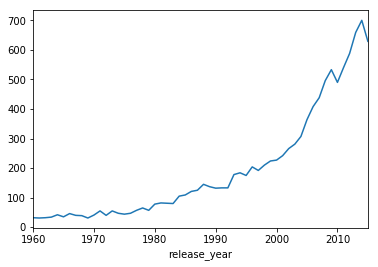

In [9]:
# How the number of movies produced each year changed over the time ? 
df.groupby('release_year').id.count().plot()

### Question 2
>#### Wich genres are popular from year to year ?

- **Get the list of all the existed genres**

In [10]:
gen_list = []
for row in df_clean.genres:
    for i in row.split('|'):
        if(i not in gen_list):
            gen_list.append(i)
gen_list

['Action',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Fantasy',
 'Crime',
 'Western',
 'Drama',
 'Family',
 'Animation',
 'Comedy',
 'Mystery',
 'Romance',
 'War',
 'History',
 'Music',
 'Horror',
 'Documentary',
 'Foreign',
 'TV Movie']

- **get all the existed years**

In [11]:
years = np.array(df_clean.groupby('release_year').sum().index)
years

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015], dtype=int64)

- **see the most popular genre for each year (mean of popularity by genres)**

In [12]:
# a dict for the year's popolar genre
year_pop_gen = {}
for year in years:
    # filter data by year
    df_temp = df_clean[df_clean['release_year'] == year]
    # calculate popularity mean for every genre in this year
    gen_popularity = {}
    for genre in gen_list:
        ls = []
        for i, row in df_temp.iterrows():
            if(genre in row['genres'].split('|')):
                ls.append(row['popularity'])
            else:
                ls.append(0)
        mean = np.mean(ls)
        gen_popularity[genre] = mean;
    # find the most popular genre for this year
    max_value = np.max([k for k in gen_popularity.values()])
    for k, v in gen_popularity.items():
        if v == max_value:
            year_pop_gen[year] = k

In [13]:
# Disply results
def display_popular_genres():
    print("\033[1;32;1m{:<15} {:<15}".format('Year','Popular Genre'))
    for k, v in year_pop_gen.items():
        print("\033[0;30;1m{:<15} {:<12}".format(k, v))
display_popular_genres()

Year            Popular Genre  
1960            Drama       
1961            Comedy      
1962            Adventure   
1963            Thriller    
1964            Comedy      
1965            Drama       
1966            Drama       
1967            Adventure   
1968            Mystery     
1969            Adventure   
1970            Comedy      
1971            Science Fiction
1972            Drama       
1973            Drama       
1974            Drama       
1975            Drama       
1976            Drama       
1977            Adventure   
1978            Horror      
1979            Science Fiction
1980            Action      
1981            Adventure   
1982            Science Fiction
1983            Action      
1984            Action      
1985            Adventure   
1986            Drama       
1987            Comedy      
1988            Comedy      
1989            Comedy      
1990            Drama       
1991            Action      
1992            Thriller    
19

**plot the number of times that a genre appears like the popular genre of the year**

In [14]:
gen_count = {}
for genre in gen_list:
    counter = 0
    for v in year_pop_gen.values():
        if v == genre:
            counter = counter + 1
        gen_count[genre] = counter

<BarContainer object of 20 artists>

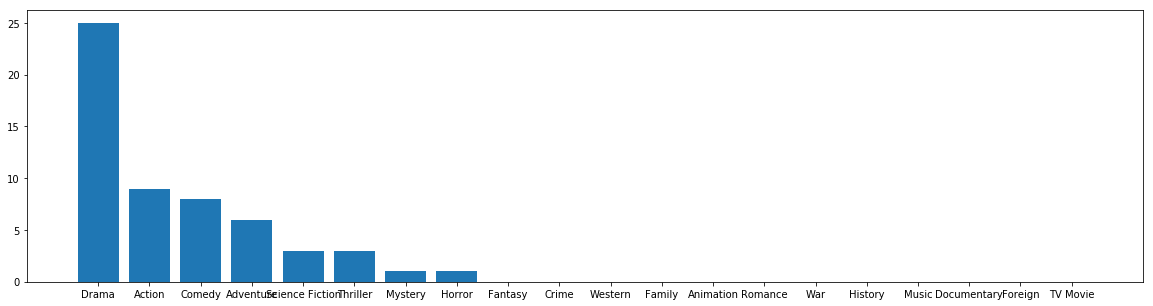

In [15]:
import operator
x,y = zip(*sorted(gen_count.items(), key=operator.itemgetter(1), reverse=True))
plt.figure(figsize=(20,5))
plt.bar(x,y)

### Question 3
> #### What kinds of properties are associated with movies that have high revenues ?

First we need to devide the dataset on two datasets one for high revenue and the second for low revenue

In [16]:
# deviding dataset
df_high = df_clean[df_clean.revenue >= df_clean.revenue.describe()['75%']]
df_low  = df_clean[df_clean.revenue < df_clean.revenue.describe()['75%']]

**Compare the begdet for high and low revenue movies**

No handles with labels found to put in legend.


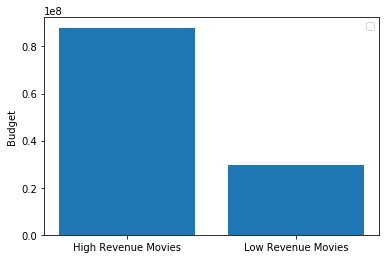

In [17]:
x = ['High Revenue Movies', 'Low Revenue Movies']
y = [df_high.budget_adj.mean(), df_low.budget_adj.mean()]
plt.ylabel('Budget')
plt.bar(x,y)
plt.legend()

**Compare the runtime for high and low revenue movies**

<BarContainer object of 2 artists>

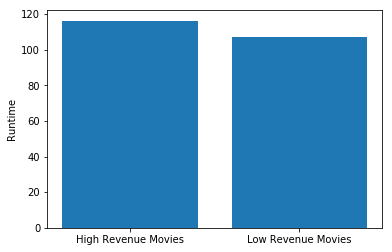

In [18]:
y = [df_high.runtime.mean(), df_low.runtime.mean()]
plt.ylabel('Runtime')
plt.bar(x,y)

**Compare the Vote Count for high and low revenue movies**

<BarContainer object of 2 artists>

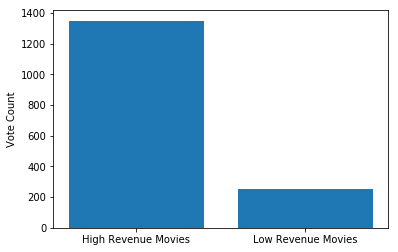

In [19]:
y = [df_high.vote_count.mean(), df_low.vote_count.mean()]
plt.ylabel('Vote Count')
plt.bar(x,y)

**Compare the Vote Average for high and low revenue movies**

<BarContainer object of 2 artists>

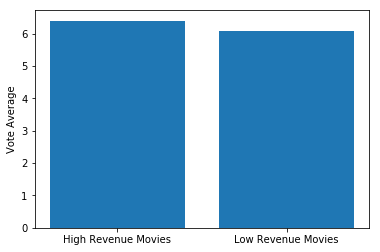

In [20]:
y = [df_high.vote_average.mean(), df_low.vote_average.mean()]
plt.ylabel('Vote Average')
plt.bar(x,y)

**Compare the Popularity for high and low revenue movies**

<BarContainer object of 2 artists>

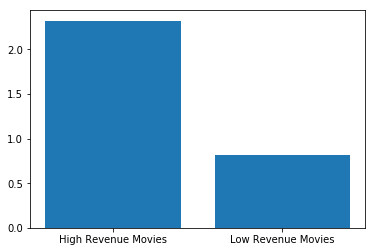

In [21]:
y = [df_high.popularity.mean(), df_low.popularity.mean()]
plt.bar(x,y)

**Compare the Popularity for high and low revenue movies**

<BarContainer object of 2 artists>

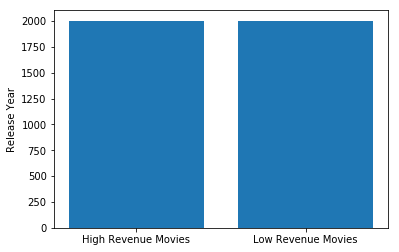

In [22]:
y = [df_high.release_year.mean(), df_low.release_year.mean()]
plt.ylabel('Release Year')
plt.bar(x,y)

<a id='conclusions'></a>
## Conclusions

- The number of movies produced each year is increasing over the time
- From the list of popular genres from year to year we found that Drama is on the top of popular genres followed by Action then Comedy then Adventure
- The properties associated with movies that have high revenue are : **budget**, **Popularity** and the **number of votes**